In [24]:
# Required libraries have been called.
import matplotlib.image as mpimg
from scipy import ndimage
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt

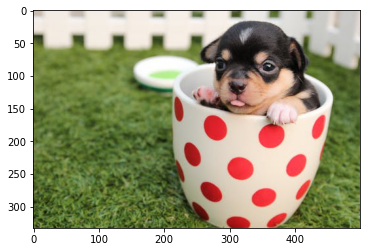

In [25]:
# The image is taking and displaying on the screen.
puppy = mpimg.imread('dog.jpeg') 
plt.imshow(puppy, cmap = plt.get_cmap('gray'))
plt.show()

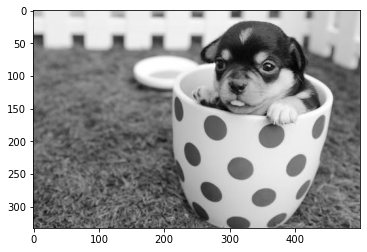

In [26]:
# Convert color image to grayscale to help extraction of edges and plot it
puppyGray = np.dot(puppy[...,:3], [0.299, 0.587, 0.114])
plt.imshow(puppyGray, cmap = plt.get_cmap('gray'))
plt.show()

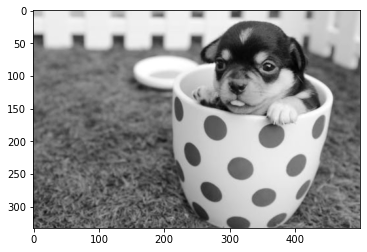

In [27]:
# Blur the grayscale image so that only important edges are extracted and the noisy ones ignored
puppyGrayBlurred = ndimage.gaussian_filter(puppyGray, sigma=0.5) 
plt.imshow(puppyGrayBlurred, cmap = plt.get_cmap('gray'))
plt.show()

In [28]:
# Apply Sobel Filter using the convolution operation
# I have used the filter to have a maximum amgnitude of 2
def SobelFilter(goruntu, yon):
    if(yon == 'x'):
        Gx = np.array([[-1,0,+1], [-2,0,+2],  [-1,0,+1]])
        Res = ndimage.convolve(goruntu, Gx)
    if(yon == 'y'):
        Gy = np.array([[-1,-2,-1], [0,0,0], [+1,+2,+1]])
        Res = ndimage.convolve(goruntu, Gy)
    return Res

In [29]:
# Normalize the pixel array, so that values are <= 1
def Normalize(goruntu):
    goruntu = goruntu/np.max(goruntu)
    return goruntu

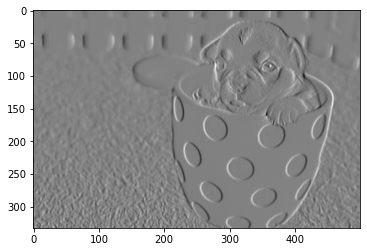

In [30]:
# Apply Sobel Filter in X direction
gx = SobelFilter(puppyGrayBlurred, 'x')
gx = Normalize(gx)
plt.imshow(gx, cmap = plt.get_cmap('gray'))
plt.show()

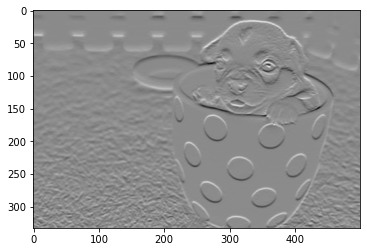

In [31]:
# Apply Sobel Filter in Y direction
gy = SobelFilter(puppyGrayBlurred, 'y')
gy = Normalize(gy)
plt.imshow(gy, cmap = plt.get_cmap('gray'))
plt.show()

In [32]:
# Apply the Sobel Filter using the inbuilt function of scipy, this was done to verify the values obtained from above
dx = ndimage.sobel(puppyGrayBlurred, axis=1) # horizontal derivative
dy = ndimage.sobel(puppyGrayBlurred, axis=0) # vertical derivative

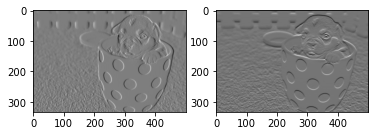

In [33]:
# Plot the derivative filter values obtained using the inbuilt function
plt.subplot(121)
plt.imshow(dx, cmap = plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow(dy, cmap = plt.get_cmap('gray'))
plt.show()

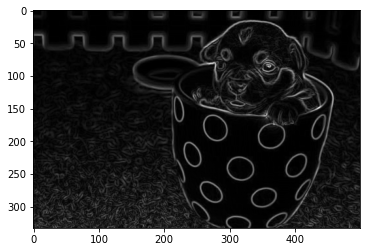

In [34]:
# Calculate the magnitude of the gradients obtained
Mag = np.hypot(gx,gy)
Mag = Normalize(Mag)
plt.imshow(Mag, cmap = plt.get_cmap('gray'))
plt.show()

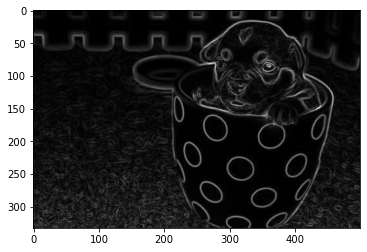

In [35]:
# Calculate the magnitude of the gradients obtained using the inbuilt function, 
# again done to verify the correctness of the above value
mag = np.hypot(dx,dy)
mag = Normalize(mag)
plt.imshow(mag, cmap = plt.get_cmap('gray'))
plt.show()

In [36]:
# Calculate direction of the gradients
Gradient = np.degrees(np.arctan2(gy,gx))

In [37]:
# Calculate the direction of the gradients obtained using the inbuilt sobel function
gradient = np.degrees(np.arctan2(dy,dx))

In [38]:
# Do Non Maximum Suppression with interpolation to get a better estimate of the magnitude values... 
#... of the pixels in the gradient direction
# This is done to get thin edges
def NonMaximumSuppressionWithInterpol(Gmag, Grad, Gx, Gy):
    NonMaxSup = np.zeros(Gmag.shape)
    
    for i in range(1, int(Gmag.shape[0]) - 1):
        for j in range(1, int(Gmag.shape[1]) - 1):
            if((Grad[i,j] >= 0 and Grad[i,j] <= 45) or (Grad[i,j] < -135 and Grad[i,j] >= -180)):
                yBot = np.array([Gmag[i,j+1], Gmag[i+1,j+1]])
                yTop = np.array([Gmag[i,j-1], Gmag[i-1,j-1]])
                x_est = np.absolute(Gy[i,j]/Gmag[i,j])
                if (Gmag[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                    NonMaxSup[i,j] = Gmag[i,j]
                else:
                    NonMaxSup[i,j] = 0
            if((Grad[i,j] > 45 and Grad[i,j] <= 90) or (Grad[i,j] < -90 and Grad[i,j] >= -135)):
                yBot = np.array([Gmag[i+1,j] ,Gmag[i+1,j+1]])
                yTop = np.array([Gmag[i-1,j] ,Gmag[i-1,j-1]])
                x_est = np.absolute(Gx[i,j]/Gmag[i,j])
                if (Gmag[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                    NonMaxSup[i,j] = Gmag[i,j]
                else:
                    NonMaxSup[i,j] = 0
            if((Grad[i,j] > 90 and Grad[i,j] <= 135) or (Grad[i,j] < -45 and Grad[i,j] >= -90)):
                yBot = np.array([Gmag[i+1,j] ,Gmag[i+1,j-1]])
                yTop = np.array([Gmag[i-1,j] ,Gmag[i-1,j+1]])
                x_est = np.absolute(Gx[i,j]/Gmag[i,j])
                if (Gmag[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                    NonMaxSup[i,j] = Gmag[i,j]
                else:
                    NonMaxSup[i,j] = 0
            if((Grad[i,j] > 135 and Grad[i,j] <= 180) or (Grad[i,j] < 0 and Grad[i,j] >= -45)):
                yBot = np.array([Gmag[i,j-1] ,Gmag[i+1,j-1]])
                yTop = np.array([Gmag[i,j+1] ,Gmag[i-1,j+1]])
                x_est = np.absolute(Gy[i,j]/Gmag[i,j])
                if (Gmag[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                    NonMaxSup[i,j] = Gmag[i,j]
                else:
                    NonMaxSup[i,j] = 0
    
    return NonMaxSup

In [39]:
# This is also non maximum suppression but without interpolation 
# i.e. the pixel closest to the gradient direction is used as the estimate
def NonMaximumSuppressionWithoutInterpol(Gmag, Grad):
    NonMaxSup = np.zeros(Gmag.shape)
    for i in range(1, int(Gmag.shape[0]) - 1):
        for j in range(1, int(Gmag.shape[1]) - 1):
            if((Grad[i,j] >= -22.5 and Grad[i,j] <= 22.5) or (Grad[i,j] <= -157.5 and Grad[i,j] >= 157.5)):
                if((Gmag[i,j] > Gmag[i,j+1]) and (Gmag[i,j] > Gmag[i,j-1])):
                    NonMaxSup[i,j] = Gmag[i,j]
                else:
                    NonMaxSup[i,j] = 0
            if((Grad[i,j] >= 22.5 and Grad[i,j] <= 67.5) or (Grad[i,j] <= -112.5 and Grad[i,j] >= -157.5)):
                if((Gmag[i,j] > Gmag[i+1,j+1]) and (Gmag[i,j] > Gmag[i-1,j-1])):
                    NonMaxSup[i,j] = Gmag[i,j]
                else:
                    NonMaxSup[i,j] = 0
            if((Grad[i,j] >= 67.5 and Grad[i,j] <= 112.5) or (Grad[i,j] <= -67.5 and Grad[i,j] >= -112.5)):
                if((Gmag[i,j] > Gmag[i+1,j]) and (Gmag[i,j] > Gmag[i-1,j])):
                    NonMaxSup[i,j] = Gmag[i,j]
                else:
                    NonMaxSup[i,j] = 0
            if((Grad[i,j] >= 112.5 and Grad[i,j] <= 157.5) or (Grad[i,j] <= -22.5 and Grad[i,j] >= -67.5)):
                if((Gmag[i,j] > Gmag[i+1,j-1]) and (Gmag[i,j] > Gmag[i-1,j+1])):
                    NonMaxSup[i,j] = Gmag[i,j]
                else:
                    NonMaxSup[i,j] = 0

    return NonMaxSup

<ipython-input-38-29e7cd460f2c>:12: RuntimeWarning: invalid value encountered in double_scalars
  x_est = np.absolute(Gy[i,j]/Gmag[i,j])


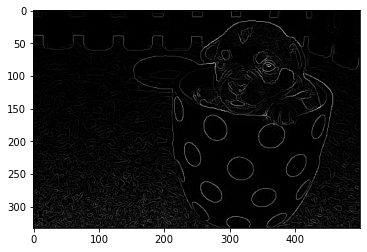

In [40]:
# Get the Non-Max Suppressed output
NonMaxSup = NonMaximumSuppressionWithInterpol(Mag, Gradient, gx, gy)
NonMaxSup = Normalize(NonMaxSup)
plt.imshow(NonMaxSup, cmap = plt.get_cmap('gray'))
plt.show()

<ipython-input-38-29e7cd460f2c>:12: RuntimeWarning: invalid value encountered in double_scalars
  x_est = np.absolute(Gy[i,j]/Gmag[i,j])


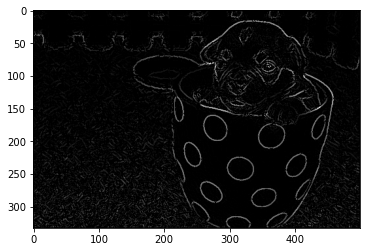

In [41]:
# Get the Non-max suppressed output on the same image but using the image using the inbuilt sobel operator

nms = NonMaximumSuppressionWithInterpol(mag, gradient, dx, dy)
nms = Normalize(nms)
plt.imshow(nms, cmap = plt.get_cmap('gray'))
plt.show()

In [42]:
# Double threshold Hysterisis
# I have used a very slow iterative approach 
def DoubleThresholdHysterisis(img):
    # HTR = High Threshold Ratio
    HTR = 0.2
    # LTR = High Threshold Ratio
    LTR = 0.15 
    GSup = np.copy(img)
    h = int(GSup.shape[0])
    w = int(GSup.shape[1])
    # HT = High Threshold
    HT = np.max(GSup) * HTR
    # LT = Low Threshold
    LT = HT * LTR    
    x = 0.1
    oldx=0
    
    # The while loop is used so that the loop will keep executing till the number of strong edges do not change, 
    # i.e all weak edges connected to strong edges have been found
    while(oldx != x):
        oldx = x
        for i in range(1,h-1):
            for j in range(1,w-1):
                if(GSup[i,j] > HT):
                    GSup[i,j] = 1
                elif(GSup[i,j] < LT):
                    GSup[i,j] = 0
                else:
                    if((GSup[i-1,j-1] > HT) or 
                        (GSup[i-1,j] > HT) or
                        (GSup[i-1,j+1] > HT) or
                        (GSup[i,j-1] > HT) or
                        (GSup[i,j+1] > HT) or
                        (GSup[i+1,j-1] > HT) or
                        (GSup[i+1,j] > HT) or
                        (GSup[i+1,j+1] > HT)):
                        GSup[i,j] = 1
        x = np.sum(GSup == 1)
    
    GSup = (GSup == 1) * GSup # This is done to remove/clean all the weak edges which are not connected to strong edges
    
    return GSup

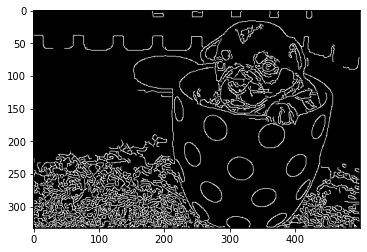

In [43]:
# The output of canny edge detection 
puppyFinal = DoubleThresholdHysterisis(NonMaxSup)
plt.imshow(puppyFinal, cmap = plt.get_cmap('gray'))
plt.show()

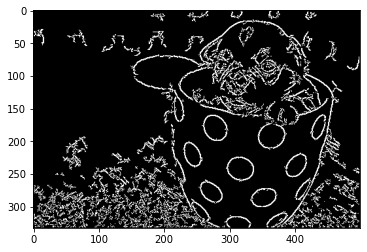

In [44]:
# The output of canny edge detection using the inputs obtaind using the inbuilt sobel operator
# Notice that the output here looks better than the one above, 
# this might be because of the low magnitude of filter value used in our implementation of the Sobel Operator
# Changing the filter to a higher value leads to more aggressive edge extraction and thus a better output.
puppy_Final = DoubleThresholdHysterisis(non_max_sup)
plt.imshow(puppy_Final, cmap = plt.get_cmap('gray'))
plt.show()